#CLASS SIZE VS SCORES BY COUNTRY

##Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Data Editing

In [ ]:
#We called our dataset and visualized it with the data.head() command.
data = pd.read_csv("pisa_data.csv")
data.head()

,CNTSCHID,LANGTEST,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,SC016Q04TA,SC017Q01NA,SC017Q02NA,SC017Q03NA,SC017Q04NA,SC017Q05NA,SC017Q06NA,SC017Q07NA,SC017Q08NA,SC161Q01SA,SC161Q02SA,SC161Q03SA,SC161Q04SA,SC161Q05SA,SC162Q01SA,SC155Q01HA,SC155Q02HA,SC155Q03HA,SC155Q04HA,SC155Q05HA,SC155Q06HA,SC155Q07HA,SC155Q08HA,SC155Q09HA,SC155Q10HA,SC155Q11HA,SC156Q01HA,SC156Q02HA,SC156Q03HA,SC156Q04HA,SC156Q05HA,SC156Q06HA,SC156Q07HA,...,SC053Q16IA,SC053D11TA,SC150Q01IA,SC150Q02IA,SC150Q03IA,SC150Q04IA,SC150Q05IA,SC164Q01HA,SC064Q01TA,SC064Q02TA,SC064Q03TA,SC064Q04NA,SC152Q01HA,SC160Q01WA,SC052Q01NA,SC052Q02NA,SC052Q03HA,PRIVATESCH,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,PROAT5AB,PROAT5AM,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,Country,Score
0,800002,140.0,1.0,1.0,95.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,8002.0,2.0,2.0,2.0,2.0,2.0,0.0,70.0,70.0,100.0,0.0,2.0,NaN,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,0.0000,26.0,0.0000,0.0000,0.1154,0.0,18.0,1.0,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,Albania,419.7
1,800003,140.0,1.0,1.0,NaN,NaN,100.0,NaN,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,8002.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,NaN,6.0,1.0000,0.3333,0.3333,0.0,13.0,1.0,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,Albania,419.7
2,800004,140.0,1.0,1.0,100.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,8002.0,1.0,1.0,1.0,1.0,1.0,1.0,62.0,80.0,60.0,90.0,1.0,1.0,1.0,1.0,1.0,public,3.0,9.7619,205.0,0.0000,NaN,21.0,1.0000,0.5238,0.4762,0.0,18.0,2.0,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,Albania,419.7
3,800005,140.0,2.0,1.0,100.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,8001.0,2.0,2.0,2.0,2.0,2.0,1.0,65.0,60.0,58.0,55.0,1.0,3.0,2.0,1.0,1.0,public,3.0,NaN,NaN,NaN,0.3333,34.5,0.6087,0.3623,0.6377,0.0,23.0,1.0,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,Albania,419.7
4,800006,140.0,2.0,1.0,100.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,8001.0,2.0,2.0,2.0,2.0,2.0,NaN,97.0,97.0,99.0,2.0,1.0,3.0,2.0,2.0,1.0,public,3.0,18.0000,315.0,0.0256,1.0000,17.5,1.0000,0.0000,0.1714,0.0,38.0,3.0,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,Albania,419.7


In [ ]:
#22560 rows and 188 columns.
data.shape

(22560, 188)

In [ ]:
#We decided whether it is true or false by looking at the types in the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22560 entries, 0 to 22559
Columns: 188 entries, CNTSCHID to Score
dtypes: float64(184), int64(2), object(2)
memory usage: 32.4+ MB


In [ ]:
#Statistical data brought.
#average class size is about 27.
#score is 459 on average.
#we can make deductions from here, for example, we can see if turkey's score is below the average or not.
#turkeyVeri = df.loc[df['Country']=='Turkey'].mean()
#turkeyVeri.head() with this code, we saw that the average score of turkey is 462.70000, and the class size is 41.26087. When we look at it, both values ​​are higher than the total.

data.describe()

,CNTSCHID,LANGTEST,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,SC016Q04TA,SC017Q01NA,SC017Q02NA,SC017Q03NA,SC017Q04NA,SC017Q05NA,SC017Q06NA,SC017Q07NA,SC017Q08NA,SC161Q01SA,SC161Q02SA,SC161Q03SA,SC161Q04SA,SC161Q05SA,SC162Q01SA,SC155Q01HA,SC155Q02HA,SC155Q03HA,SC155Q04HA,SC155Q05HA,SC155Q06HA,SC155Q07HA,SC155Q08HA,SC155Q09HA,SC155Q10HA,SC155Q11HA,SC156Q01HA,SC156Q02HA,SC156Q03HA,SC156Q04HA,SC156Q05HA,SC156Q06HA,SC156Q07HA,...,SC053Q14IA,SC053Q15IA,SC053Q16IA,SC053D11TA,SC150Q01IA,SC150Q02IA,SC150Q03IA,SC150Q04IA,SC150Q05IA,SC164Q01HA,SC064Q01TA,SC064Q02TA,SC064Q03TA,SC064Q04NA,SC152Q01HA,SC160Q01WA,SC052Q01NA,SC052Q02NA,SC052Q03HA,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,PROAT5AB,PROAT5AM,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,Score
count,2.256000e+04,21761.000000,21179.000000,20451.000000,19481.000000,16918.000000,16322.000000,15660.000000,21449.000000,21389.000000,21387.000000,21296.000000,21468.000000,21431.000000,21482.000000,21470.000000,21032.000000,21032.000000,21032.000000,21032.000000,21032.000000,18860.000000,21513.000000,21501.000000,21469.000000,21501.000000,21500.000000,21517.000000,21514.000000,21506.000000,21477.000000,21490.000000,21517.000000,21508.000000,21468.000000,21450.000000,21487.000000,21478.000000,21476.000000,21465.000000,...,20958.000000,20856.000000,20759.000000,2.256000e+04,19948.000000,19822.000000,19769.000000,19764.000000,19793.000000,17062.000000,20706.000000,20742.000000,20211.000000,17835.000000,21404.000000,10904.000000,21128.000000,20971.000000,21073.000000,20973.000000,18678.000000,18959.000000,18486.000000,18682.000000,19489.000000,18792.000000,19304.000000,19660.000000,19513.000000,19880.000000,21077.00000,21391.000000,21404.000000,21503.000000,21486.000000,18009.000000,22560.000000,22560.000000,22560.000000,22560.000000
mean,4.379340e+07,309.647856,3.009066,1.188255,82.314614,16.299858,2.777662,3.814943,1.826379,1.720090,1.984710,1.669797,2.095491,2.024171,2.115352,2.106940,0.075552,0.384176,0.405953,0.368058,0.175494,1.654189,2.748896,2.700340,2.610927,2.648342,2.691302,2.775015,2.715023,2.746768,2.516366,2.562448,2.600781,1.403524,1.501584,1.484662,1.324522,1.422060,1.470060,1.588400,...,1.285094,1.493767,1.685727,3.005139e+06,1.497042,1.767783,1.870403,1.848816,1.829334,5.591900,45.713175,54.978787,26.838306,21.865994,1.488554,2.841985,1.358103,1.412188,1.411427,2.732132,13.603531,774.942718,0.744500,0.901652,59.592514,0.810662,0.601097,0.337577,0.020879,26.999748,1.82953,0.127519,-0.012176,0.046633,0.111626,-0.073499,25.130518,1388.895444,18.617021,459.335762
std,2.712370e+07,145.240503,1.293910,0.390925,29.976316,30.331821,9.227081,12.514871,0.914659,0.817427,1.005363,0.852162,0.976890,0.929314,1.024629,1.011565,0.264286,0.486412,0.491087,0.482289,0.380399,0.475645,0.921358,0.934165,0.903822,0.871729,0.835182,0.677290,0.753547,0.755385,0.859833,0.888987,0.908142,0.490616,0.500009,0.499776,0.468207,0.493899,0.499114,0.492135,...,0.451470,0.499973,0.464237,4.285514e+06,0.500004,0.422257,0.335868,0.358237,0.376227,12.126121,30.145489,31.582176,30.917945,28.224387,0.499881,0.753161,0.479454,0.492240,0.492104,0.621900,9.258271,768.788175,0.834793,0.254327,58.039674,0.330342,0.398217,0.346637,0.063915,10.127178,1.03924,1.092457,1.057889,1.240017,1.162506,1.075184,74.464006,3222.890897,22.856424,51.541440
min,8.000020e+05,113.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,8.001000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0

##Data Preprocessing

In [ ]:
#selected the columns that I would like to process and deleted the other columns in the dataset that were confusing.
#just chose the columns I will work with briefly.
columns = ['CLSIZE','Score','Country']
df = data[columns]

In [ ]:
df

,CLSIZE,Score,Country
0,18.0,419.7,Albania
1,13.0,419.7,Albania
2,18.0,419.7,Albania
3,23.0,419.7,Albania
4,38.0,419.7,Albania
...,...,...,...
22555,18.0,481.7,Tatarstan(RUS)
22556,13.0,481.7,Tatarstan(RUS)
22557,13.0,481.7,Tatarstan(RUS)
22558,13.0,481.7,Tatarstan(RUS)


In [ ]:
#2680 NA.
df.isna().sum()

CLSIZE     0
Score      0
Country    0
dtype: int64

In [ ]:
#filling in the missing values
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df.isna().sum()
#No more NA.

CLSIZE     0
Score      0
Country    0
dtype: int64

##Visualization

In [ ]:
#grouped by country and averaged the number of classes.
#For example, the average number of students in the class of Argentina is about 34.

result=df.groupby('Country')['CLSIZE','Score'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [ ]:
result

,CLSIZE,Score
Country,,
Albania,22.978592,419.7
Argentina,34.542844,395.0
Australia,24.636934,499.0
Austria,21.725081,491.0
B-S-J-Z (China),38.526316,578.7
...,...,...
United Arab Emirates,28.346986,433.7
United Kingdom,25.225009,503.7
United States,25.774360,495.0


In [ ]:

result.corr()

,CLSIZE,Score
CLSIZE,1.000000,-0.261053
Score,-0.261053,1.000000


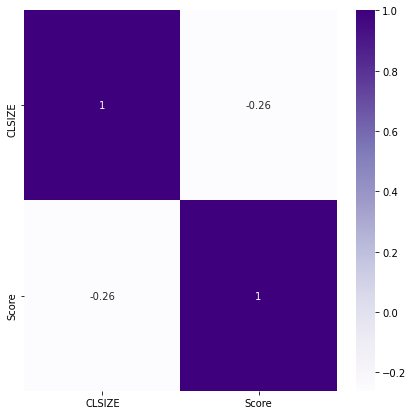

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(result.corr(),annot = True, cmap = 'Purples');
#There is a negative relationship between them.
##Değişkenlerden biri artarken diğeri azalır diye bilir miyiz negatif olduğu için?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


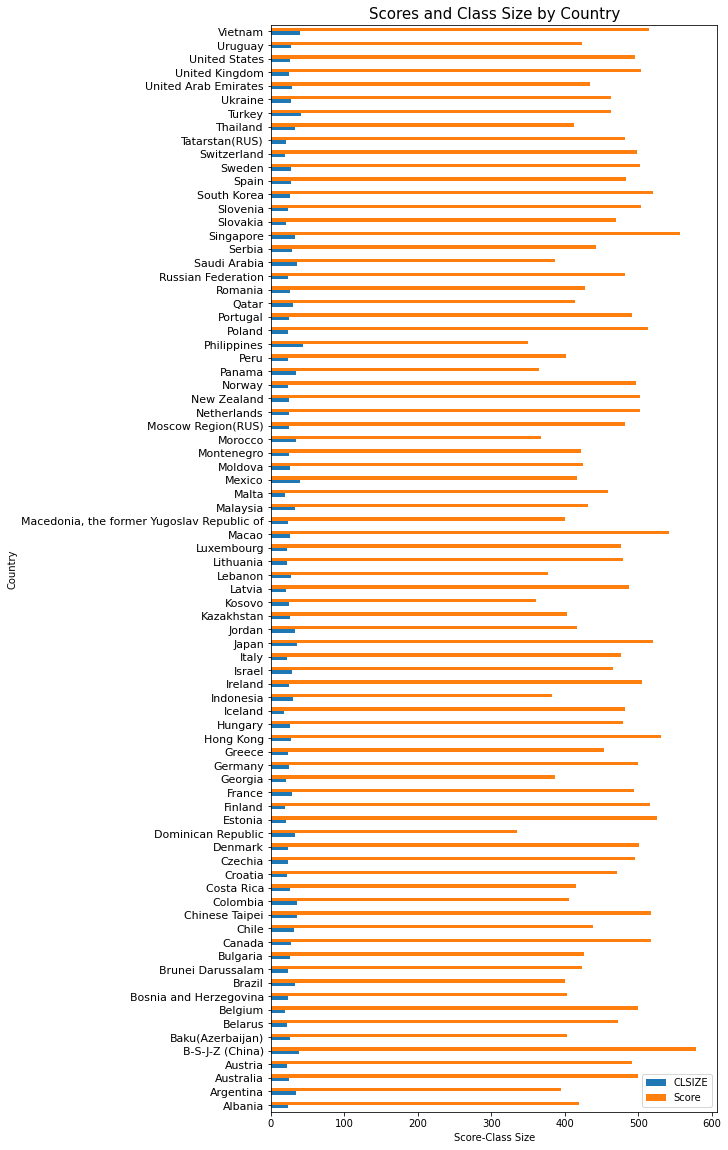

In [ ]:
result.groupby('Country')['CLSIZE','Score'].mean().plot(kind ="barh",figsize=(8,20))
plt.yticks(size = 11)
plt.xlabel("Score-Class Size",size = 10)
plt.ylabel("Country",size = 10)
plt.title("Scores and Class Size by Country",size = 15)
plt.show()


###1.We observed that the increase in the number of students per class does not decrease the success. For example, China, the most successful country, is one of the countries with the highest number of students. We can not say for sure.
###2.Which are the OECD countries that are improving even though the number of students is increasing? we can talk. 
###3.Depending on the population ratio, we can think that the class size is low.
###4.But in general, we can say that the class size is crowded in successful countries.

##Best 5 Scores

In [ ]:
best_5_scores = result.nlargest(5,'Score')


In [ ]:
best_5_scores = best_5_scores.reset_index()

In [ ]:
best_5_scores

,Country,CLSIZE,Score
0,B-S-J-Z (China),38.526316,578.7
1,Singapore,32.879518,556.3
2,Macao,25.777778,542.3
3,Hong Kong,27.440723,530.7
4,Estonia,20.856518,525.3


In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.barplot(y='Country', hue='Score', x='CLSIZE', data=best_5_scores,palette = 'Set1')
plt.title("Top 5 countries showing how class size relates to success")



NameError: ignored

###1.We observed that although China has the highest class size, it is the most successful country.
###2.Or we observed that Estonia has the lowest class size compared to the other 4 countries, but also has the lowest score.
###3.So we can deduce that success is not only dependent on class size.

##Worst 5 Scores

In [ ]:
worst_5_scores =result.nsmallest(5,'Score')

In [ ]:
worst_5_scores = worst_5_scores.reset_index()

In [ ]:
worst_5_scores

,Country,CLSIZE,Score
0,Dominican Republic,33.382941,334.3
1,Philippines,43.695187,350.0
2,Kosovo,25.080562,361.3
3,Panama,33.731161,365.0
4,Morocco,33.580997,368.0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


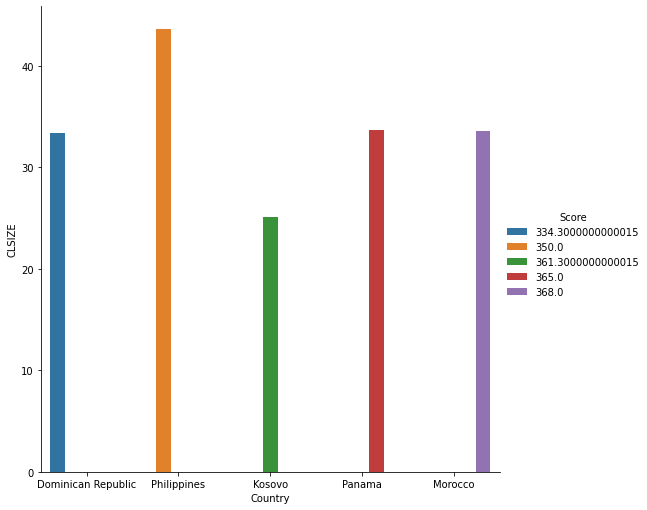

In [ ]:
sns.factorplot(x='Country', hue='Score', y='CLSIZE', data=worst_5_scores, kind='bar', size=7)



##Top 5 Class Sıze(Crowded)

In [ ]:
crowded_5_class = result.nlargest(5,'CLSIZE')

In [ ]:
crowded_5_class = crowded_5_class.reset_index()

In [ ]:
crowded_5_class

,Country,CLSIZE,Score
0,Philippines,43.695187,350.0
1,Turkey,41.107524,462.7
2,Vietnam,39.589404,514.0
3,Mexico,39.087409,416.0
4,B-S-J-Z (China),38.526316,578.7


Text(0.5, 1.0, 'Top 3 countries showing how class size relates to success')

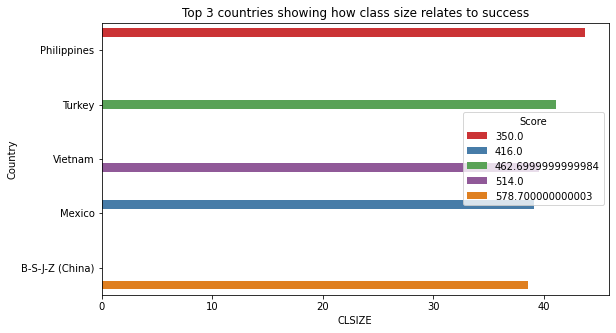

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.barplot(y='Country', hue='Score', x='CLSIZE', data=crowded_5_class,palette = 'Set1')
plt.title("Top 5 countries showing how class size relates to success")


### Here, when we look at the class size of Turkey, it is among the second successful countries in terms of score, even though it is the second most crowded class.(just by looking at this visualization)